## Feature Engineering with Linear Regression: Applied to the Ames Housing Data

Using the Ames Housing Data:

Dean De Cock
Truman State University
Journal of Statistics Education Volume 19, Number 3(2011), www.amstat.org/publications/jse/v19n3/decock.pdf

In this notebook, we will build some linear regression models to predict housing prices from this data. In particular, we will set out to improve on a baseline set of features via **feature engineering**: deriving new features from our existing data. Feature engineering often makes the difference between a weak model and a strong one.

We will use visual exploration, domain understanding, and intuition to construct new features that will be useful later in the course as we turn to prediction.

**Notebook Contents**

> 1. Simple EDA 
> 2. One-hot Encoding variables
> 3. Log transformation for skewed variables
> 4. Pair plot for features
> 5. Basic feature engineering: adding polynomial and interaction terms
> 6. Feature engineering: categories and features derived from category aggregates 

## 1. Simple EDA 

In [117]:
import pandas as pd
import seaborn as sns
import numpy as np
import skillsnetwork
import matplotlib.pyplot as plt

In [118]:
df = pd.read_csv('Data/Ames_Housing_Data.tsv', sep='\t')
data = df.copy()

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [120]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# Dataset Feature Descriptions

- **Order**: Index or unique row identifier.
- **PID**: Property ID.
- **MS SubClass**: Building class category.
- **MS Zoning**: Zoning classification of the sale.
- **Lot Frontage**: Street frontage in linear feet.
- **Lot Area**: Lot size in square feet.
- **Street**: Type of street access to property.
- **Alley**: Type of alley access, if available.
- **Lot Shape**: Shape of the lot.
- **Land Contour**: Land contour (e.g., level, sloped).
- **Utilities**: Utilities available (e.g., all public utilities).
- **Lot Config**: Lot configuration (e.g., corner, inside lot).
- **Land Slope**: Slope of property.
- **Neighborhood**: Neighborhood location within the city.
- **Condition 1**: Proximity to main conditions (e.g., road, railroad).
- **Condition 2**: Secondary proximity condition.
- **Bldg Type**: Type of dwelling (e.g., single-family).
- **House Style**: Architectural style.
- **Overall Qual**: Overall quality rating.
- **Overall Cond**: Overall condition rating.
- **Year Built**: Original construction year.
- **Year Remod/Add**: Year of remodeling or addition.
- **Roof Style**: Style of roof.
- **Roof Matl**: Roof material type.
- **Exterior 1st**: Primary exterior material.
- **Exterior 2nd**: Secondary exterior material.
- **Mas Vnr Type**: Masonry veneer type.
- **Mas Vnr Area**: Masonry veneer area in square feet.
- **Exter Qual**: Exterior material quality.
- **Exter Cond**: Exterior material condition.
- **Foundation**: Type of foundation.
- **Bsmt Qual**: Basement quality.
- **Bsmt Cond**: Basement condition.
- **Bsmt Exposure**: Basement exposure rating.
- **BsmtFin Type 1**: Type of basement finished area.
- **BsmtFin SF 1**: Square feet of finished basement area.
- **BsmtFin Type 2**: Secondary type of basement finish.
- **BsmtFin SF 2**: Square feet of secondary finished basement area.
- **Bsmt Unf SF**: Unfinished basement square feet.
- **Total Bsmt SF**: Total basement square feet.
- **Heating**: Type of heating.
- **Heating QC**: Heating quality rating.
- **Central Air**: Central air conditioning (Yes/No).
- **Electrical**: Electrical system type.
- **1st Flr SF**: First floor square feet.
- **2nd Flr SF**: Second floor square feet.
- **Low Qual Fin SF**: Low quality finished area in square feet.
- **Gr Liv Area**: Above ground living area in square feet.
- **Bsmt Full Bath**: Basement full bathrooms.
- **Bsmt Half Bath**: Basement half bathrooms.
- **Full Bath**: Full bathrooms above ground.
- **Half Bath**: Half bathrooms above ground.
- **Bedroom AbvGr**: Bedrooms above ground level.
- **Kitchen AbvGr**: Kitchens above ground level.
- **Kitchen Qual**: Kitchen quality rating.
- **TotRms AbvGrd**: Total rooms above ground.
- **Functional**: Home functionality rating.
- **Fireplaces**: Number of fireplaces.
- **Fireplace Qu**: Fireplace quality rating.
- **Garage Type**: Type of garage.
- **Garage Yr Blt**: Year garage was built.
- **Garage Finish**: Interior finish of the garage.
- **Garage Cars**: Garage car capacity.
- **Garage Area**: Garage area in square feet.
- **Garage Qual**: Garage quality.
- **Garage Cond**: Garage condition.
- **Paved Drive**: Driveway paving type.
- **Wood Deck SF**: Wood deck area in square feet.
- **Open Porch SF**: Open porch area in square feet.
- **Enclosed Porch**: Enclosed porch area in square feet.
- **3Ssn Porch**: Three-season porch area in square feet.
- **Screen Porch**: Screened porch area in square feet.
- **Pool Area**: Pool area in square feet.
- **Pool QC**: Pool quality.
- **Fence**: Fence quality.
- **Misc Feature**: Miscellaneous feature.
- **Misc Val**: Value of miscellaneous feature.
- **Mo Sold**: Month sold.
- **Yr Sold**: Year sold.
- **Sale Type**: Type of sale.
- **Sale Condition**: Sale condition.
- **SalePrice**: Sale price of the property.

We're going to first do some basic data cleaning on this data:

- Converting categorical variables to dummies
- Making skew variables symmetric

### One-hot encoding for dummy variables:

In [121]:
one_hot_encode_cols = df.dtypes[df.dtypes == 'object'].index.tolist()
df[one_hot_encode_cols].head().T

,0,1,2,3,4
MS Zoning,RL,RH,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
Lot Shape,IR1,Reg,IR1,Reg,IR1
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
Lot Config,Corner,Inside,Corner,Corner,Inside
Land Slope,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,NAmes,NAmes,NAmes,NAmes,Gilbert
Condition 1,Norm,Feedr,Norm,Norm,Norm


In [122]:
# Do the one hot encoding
df = pd.get_dummies(df, columns=one_hot_encode_cols, drop_first=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order,2930.0,1.465500e+03,8.459625e+02,1.0,7.332500e+02,1465.5,2.197750e+03,2.930000e+03
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MS SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
Overall Qual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2907.0,1.018968e+02,1.791126e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03


### Log transforming skew variables

In [123]:
#Create a list of float columns to check for skewing
mask = df.dtypes == float
float_cols = df.columns[mask]

skew_limit = 0.75  # define a limit above which we will log transform
skew_vals = df[float_cols].skew()

In [124]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0: 'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
BsmtFin SF 2,4.139978
Bsmt Half Bath,3.940795
Mas Vnr Area,2.606985
Lot Frontage,1.499067
BsmtFin SF 1,1.416182
Total Bsmt SF,1.156204
Bsmt Unf SF,0.923053


Text(0.5, 0.98, 'Field "BsmtFin SF 1" Before and After log1p')

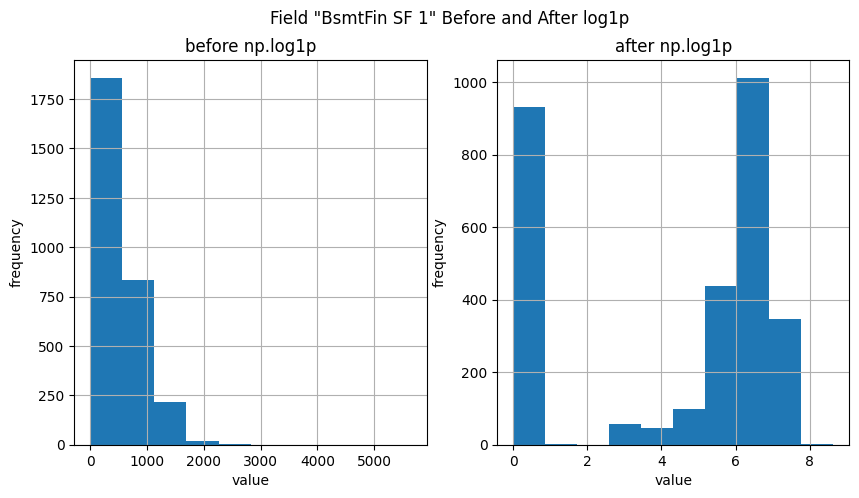

In [125]:
# Let's look at what happens to one of these features, when we apply np.log1p visually

# Choose a field
field = "BsmtFin SF 1"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
df[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
df[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}" Before and After log1p'.format(field))


In [126]:
# Perform the skew transformation:

for col in skew_cols.index.tolist():
    if col == 'SalePrice':
        continue
    df[col] = df[col].apply(np.log1p)

In [127]:
 # we now have a large number of features that are potentially-usefull
df.shape

(2930, 263)

In [128]:
# There are a lot of features, and we can't visualize all of them at once, so we will look at the correlation of the features with the target to see which ones are most important
df = data
data.isnull().sum().sort_values(ascending=False)

Pool QC         2917
Misc Feature    2824
Alley           2732
Fence           2358
Mas Vnr Type    1775
                ... 
PID                0
Central Air        0
1st Flr SF         0
2nd Flr SF         0
SalePrice          0
Length: 82, dtype: int64

 Let's pick out just a few numeric columns to illustrate basic feature transformations.

In [129]:
smaller_df= df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond', 
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
                      'Garage Cars','SalePrice']]

In [130]:
# Now we can look at summary statistics of the subset data
smaller_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lot Area,2930.0,10147.921843,7880.017759,1300.0,7440.25,9436.5,11555.25,215245.0
Overall Qual,2930.0,6.094881,1.411026,1.0,5.00,6.0,7.00,10.0
Overall Cond,2930.0,5.563140,1.111537,1.0,5.00,5.0,6.00,9.0
Year Built,2930.0,1971.356314,30.245361,1872.0,1954.00,1973.0,2001.00,2010.0
Year Remod/Add,2930.0,1984.266553,20.860286,1950.0,1965.00,1993.0,2004.00,2010.0
Gr Liv Area,2930.0,1499.690444,505.508887,334.0,1126.00,1442.0,1742.75,5642.0
Full Bath,2930.0,1.566553,0.552941,0.0,1.00,2.0,2.00,4.0
Bedroom AbvGr,2930.0,2.854266,0.827731,0.0,2.00,3.0,3.00,8.0
Fireplaces,2930.0,0.599317,0.647921,0.0,0.00,1.0,1.00,4.0
Garage Cars,2929.0,1.766815,0.760566,0.0,1.00,2.0,2.00,5.0


In [131]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2930 non-null   int64  
 1   Overall Qual    2930 non-null   int64  
 2   Overall Cond    2930 non-null   int64  
 3   Year Built      2930 non-null   int64  
 4   Year Remod/Add  2930 non-null   int64  
 5   Gr Liv Area     2930 non-null   int64  
 6   Full Bath       2930 non-null   int64  
 7   Bedroom AbvGr   2930 non-null   int64  
 8   Fireplaces      2930 non-null   int64  
 9   Garage Cars     2929 non-null   float64
 10  SalePrice       2930 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 251.9 KB


In [132]:
# There appears to be one NA in Garage Cars - we will take a simple approach and fill it with 0
smaller_df = smaller_df.fillna(0)
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2930 non-null   int64  
 1   Overall Qual    2930 non-null   int64  
 2   Overall Cond    2930 non-null   int64  
 3   Year Built      2930 non-null   int64  
 4   Year Remod/Add  2930 non-null   int64  
 5   Gr Liv Area     2930 non-null   int64  
 6   Full Bath       2930 non-null   int64  
 7   Bedroom AbvGr   2930 non-null   int64  
 8   Fireplaces      2930 non-null   int64  
 9   Garage Cars     2930 non-null   float64
 10  SalePrice       2930 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 251.9 KB



### Pair plot of features
Now that we have a nice, filtered dataset, let's generate visuals to better understand the target and feature-target relationships: pairplot is great for this!

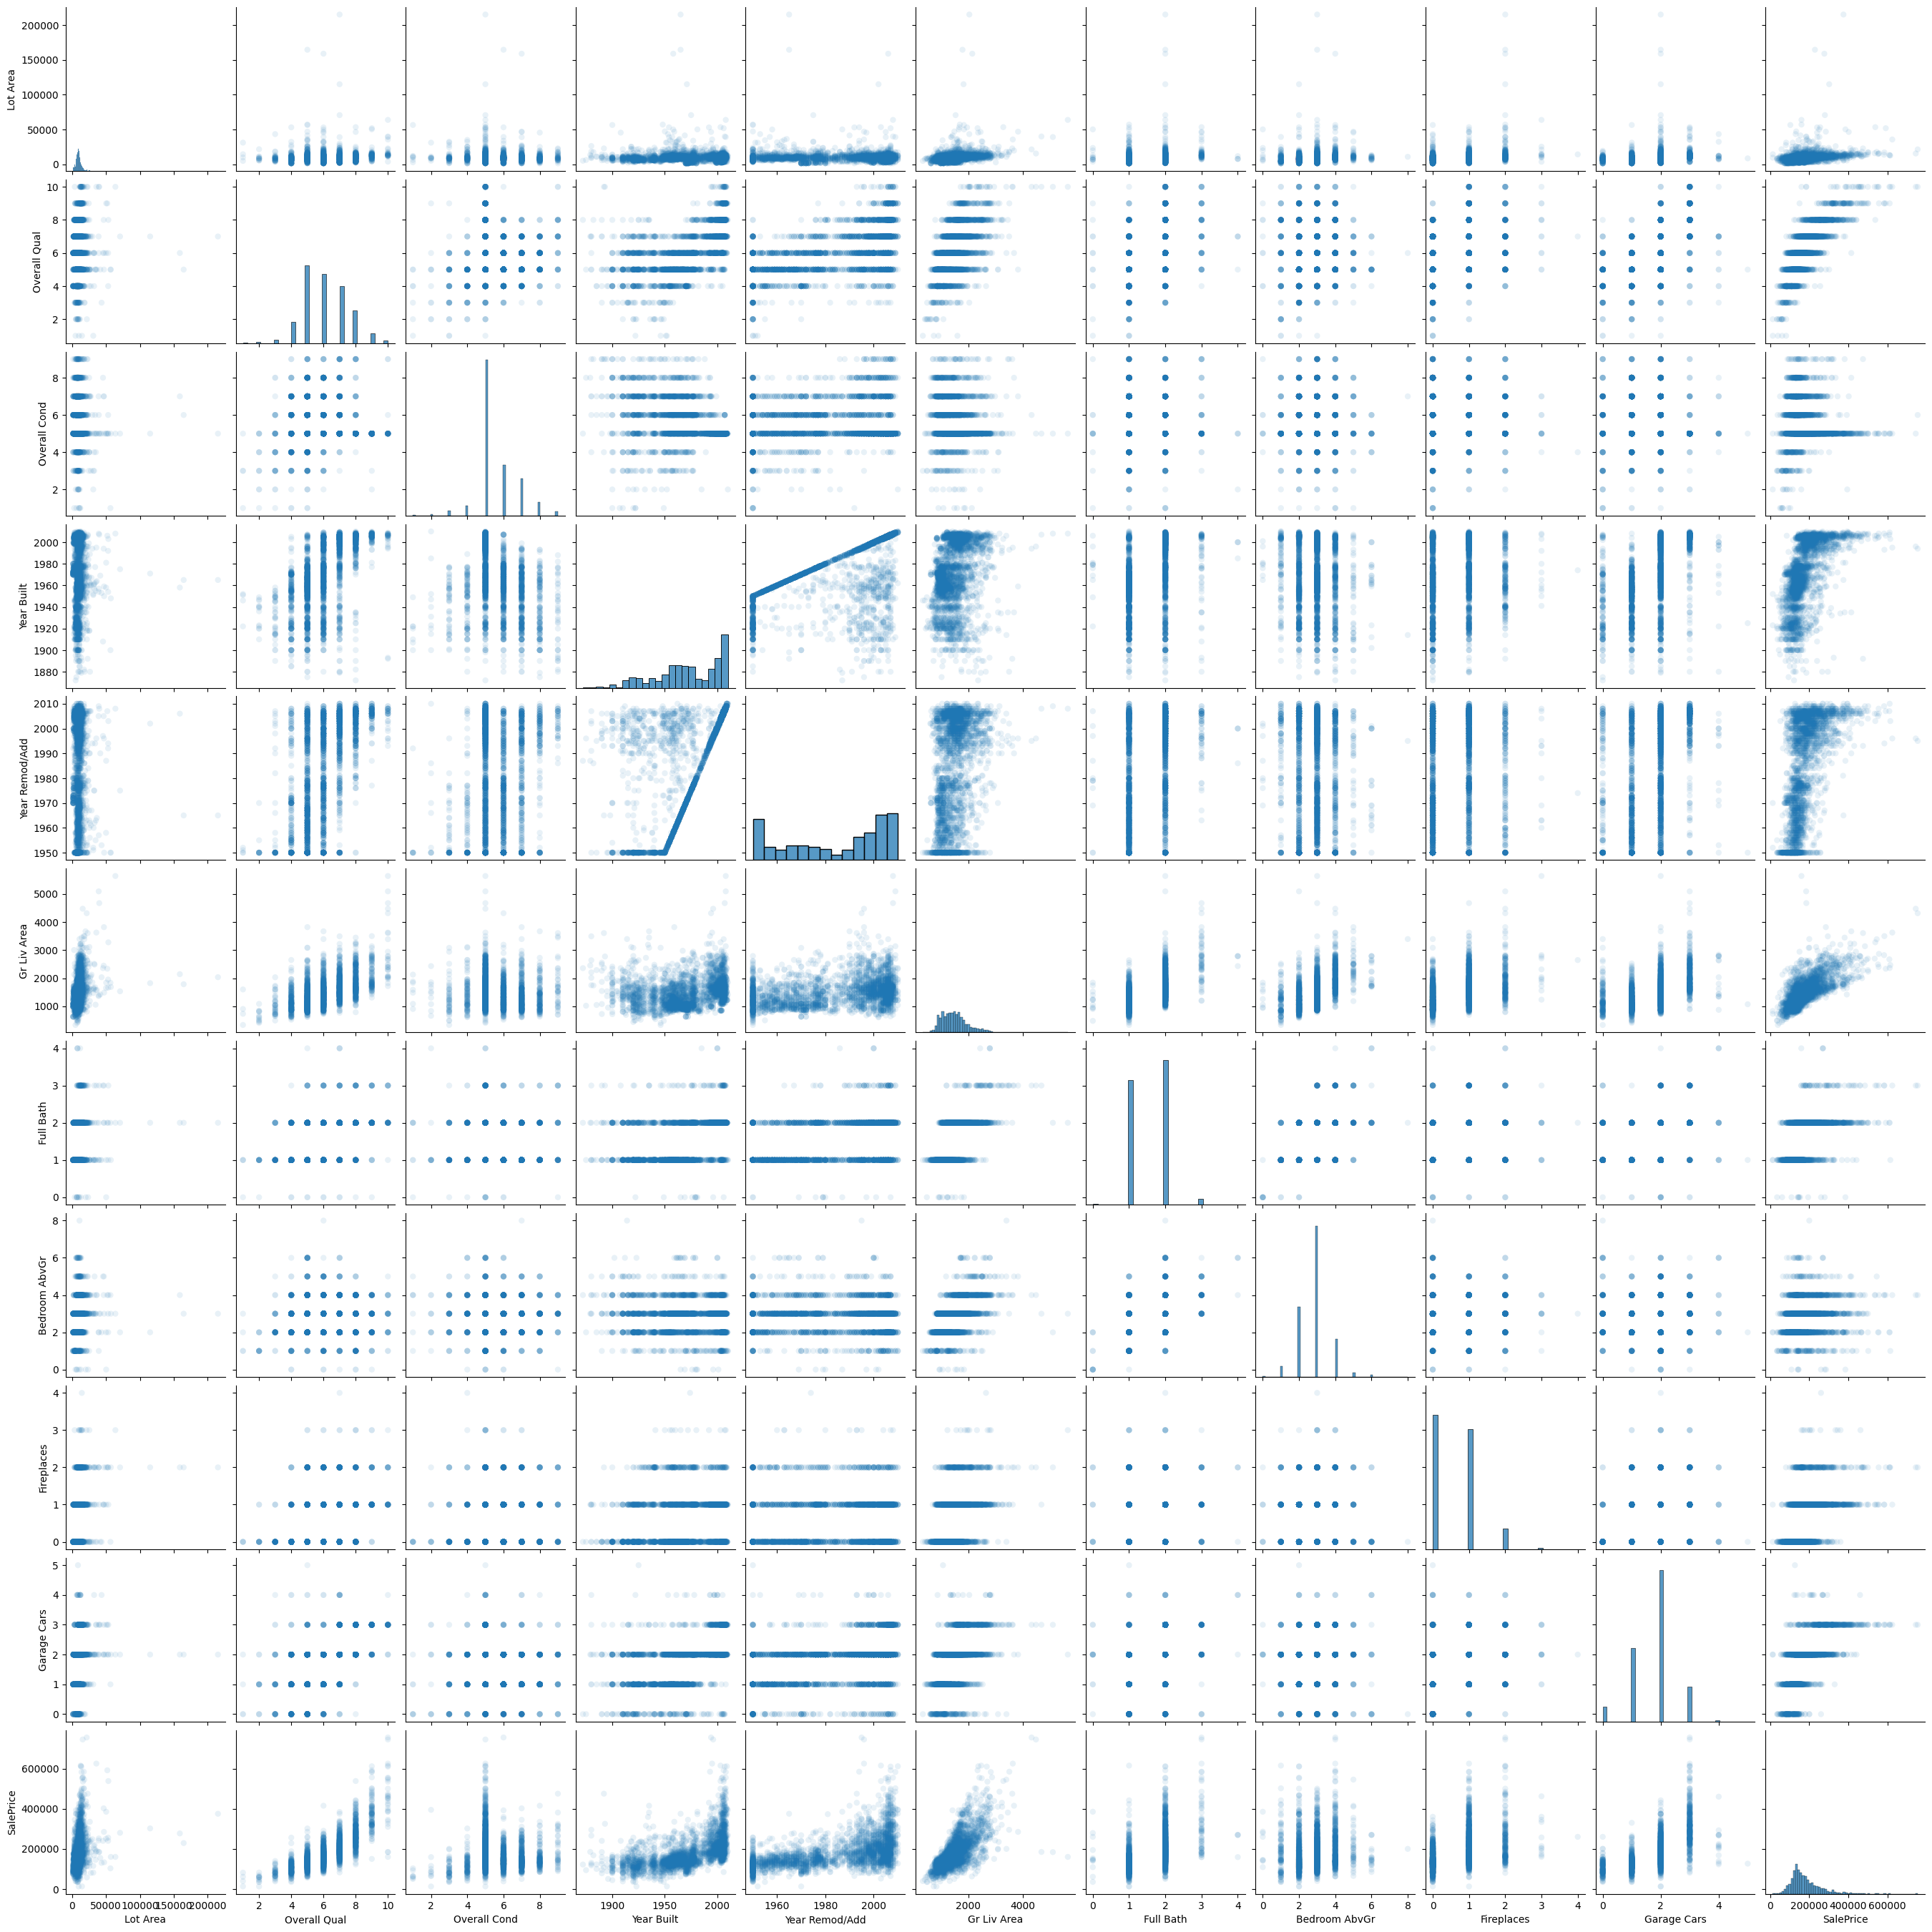

In [133]:
sns.pairplot(smaller_df, plot_kws=dict(alpha=.1, edgecolor='none'))

---
**Data Exploration Discussion**: 

1. What do these plots tell us about the distribution of the target?   

2. What do these plots tell us about the relationship between the features and the target? Do you think that linear regression is well-suited to this problem? Do any feature transformations come to mind?

3. What do these plots tell us about the relationship between various pairs of features? Do you think there may be any problems here? 

---

#### Suppose our target variable is the SalePrice. We can set up separate variables for features and target.

In [134]:
#Separate our features from our target

X = smaller_df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond', 
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
                      'Garage Cars']]

y = smaller_df['SalePrice']

In [135]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2930 non-null   int64  
 1   Overall Qual    2930 non-null   int64  
 2   Overall Cond    2930 non-null   int64  
 3   Year Built      2930 non-null   int64  
 4   Year Remod/Add  2930 non-null   int64  
 5   Gr Liv Area     2930 non-null   int64  
 6   Full Bath       2930 non-null   int64  
 7   Bedroom AbvGr   2930 non-null   int64  
 8   Fireplaces      2930 non-null   int64  
 9   Garage Cars     2930 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 229.0 KB


Now that we have feature/target data X, y ready to go, we're nearly ready to fit and evaluate a baseline model using our current feature set. We'll need to create a **train/validation split** before we fit and score the model. 

Since we'll be repeatedly splitting X, y into the same train/val partitions and fitting/scoring new models as we update our feature set, we'll define a reusable function that completes all these steps, making our code/process more efficient going forward. 

Great, let's go ahead and run this function on our baseline feature set and take some time to analyze the results.

### Basic feature engineering: adding polynomial and interaction terms

One of the first things that we looked for in the pairplot was evidence about the relationship between each feature and the target. In certain features like _'Overall Qual'_ and _'Gr Liv Qual'_, we notice an upward-curved relationship rather than a simple linear correspondence. This suggests that we should add quadratic **polynomial terms or transformations** for those features, allowing us to express that non-linear relationship while still using linear regression as our model.

Luckily, pandas makes it quite easy to quickly add those square terms as additional features to our original feature set. We'll do so and evaluate our model again below.

As we add to our baseline set of features, we'll create a copy of the latest benchmark so that we can continue to store our older feature sets. 
### Polynomial Features

In [136]:
X2 = X.copy()

X2['OQ2'] = X2['Overall Qual'] ** 2
X2['GLA2'] = X2['Gr Liv Area'] ** 2


As is, each feature is treated as an independent quantity. However, there may be **interaction effects**, in which the impact of one feature may dependent on the current value of a different feature.

For example, there may be a higher premium for increasing _'Overall Qual'_ for houses that were built more recently. If such a premium or a similar effect exists, a feature that multiplies _'Overall Qual'_ by _'Year Built'_ can help us capture it.

Another style of interaction term involves feature proprtions: for example, to get at something like quality per square foot we could divide _'Overall Qual'_ by _'Lot Area'_.

Let's try adding both of these interaction terms and see how they impact the model results.

### Feature interactions

In [137]:
X3 = X2.copy()

# multiplicative interaction
X3['OQ_x_YB'] = X3['Overall Qual'] * X3['Year Built']

# division interaction
X3['OQ_/_LA'] = X3['Overall Qual'] / X3['Lot Area']



-----
**Interaction Feature Exercise**: What other interactions do you think might be helpful? Why? 

-----

Incorporating **categorical features** into linear regression models is fairly straightforward: we can create a new feature column for each category value, and fill these columns with 1s and 0s to indicate which category is present for each row. This method is called **dummy variables** or **one-hot-encoding**.

We'll first explore this using the _'House Style'_ feature from the original dataframe. Before going straight to dummy variables, it's a good idea to check category counts to make sure all categories have reasonable representation.

In [138]:
data['House Style'].value_counts()

House Style
1Story    1481
2Story     873
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: count, dtype: int64

This looks ok, and here's a quick look at how dummy features actually appear:

In [139]:
pd.get_dummies(df['House Style'], drop_first=True).head()

,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
0,False,True,False,False,False,False,False
1,False,True,False,False,False,False,False
2,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False
4,False,False,False,False,True,False,False


We can call `pd.get_dummies()` on our entire dataset to quickly get data with all the original features and dummy variable representation of any categorical features. Let's look at some variable values.

In [140]:
nbh_counts = df.Neighborhood.value_counts()
nbh_counts

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64

For this category, let's map the few least-represented neighborhoods to an "other" category before adding the feature to our feature set and running a new benchmark.

In [141]:
other_nbhs = list(nbh_counts[nbh_counts <= 8].index)

other_nbhs

['Greens', 'GrnHill', 'Landmrk']

In [142]:
X4 = X3.copy()

X4['Neighborhood'] = df['Neighborhood'].replace(other_nbhs, 'Other')


#### Getting to fancier features

Let's close out our introduction to feature engineering by considering a more complex type of feature that may work very nicely for certain problems. It doesn't seem to add a great deal over what we have so far, but it's a style of engineering to keep in mind for the future.

We'll create features that capture where a feature value lies relative to the members of a category it belongs to. In particular, we'll calculate deviance of a row's feature value from the mean value of the category that row belongs to. This helps to capture information about a feature relative to the category's distribution, e.g. how nice a house is relative to other houses in its neighborhood or of its style.

Below we define reusable code for generating features of this form, feel free to repurpose it for future feature engineering work!

In [143]:
def add_deviation_feature(X, feature, category):
    
    # temp groupby object
    category_gb = X.groupby(category)[feature]
    
    # create category means and standard deviations for each observation
    category_mean = category_gb.transform(lambda x: x.mean())
    category_std = category_gb.transform(lambda x: x.std())
    
    # compute stds from category mean for each feature value,
    # add to X as new feature
    deviation_feature = (X[feature] - category_mean) / category_std 
    X[feature + '_Dev_' + category] = deviation_feature  

And now let's use our feature generation code to add 2 new deviation features, and run a final benchmark.

In [144]:
X5 = X4.copy()
X5['House Style'] = df['House Style']
add_deviation_feature(X5, 'Year Built', 'House Style')
add_deviation_feature(X5, 'Overall Qual', 'Neighborhood')


## Polynomial Features in Scikit-Learn

`sklearn` allows you to build many higher-order terms at once with `PolynomialFeatures`

In [145]:
from sklearn.preprocessing import PolynomialFeatures

In [146]:
#Instantiate and provide desired degree; 
#   Note: degree=2 also includes intercept, degree 1 terms, and cross-terms

pf = PolynomialFeatures(degree=2)

In [147]:
features = ['Lot Area', 'Overall Qual']
pf.fit(df[features])

PolynomialFeatures()

In [149]:
pf.get_feature_names_out(input_features=features)  #Must add input_features = features for appropriate names

array(['1', 'Lot Area', 'Overall Qual', 'Lot Area^2',
       'Lot Area Overall Qual', 'Overall Qual^2'], dtype=object)

In [151]:
feat_array = pf.transform(df[features])
pd.DataFrame(feat_array, columns = pf.get_feature_names_out(input_features=features))

,1,Lot Area,Overall Qual,Lot Area^2,Lot Area Overall Qual,Overall Qual^2
0,1.0,31770.0,6.0,1.009333e+09,190620.0,36.0
1,1.0,11622.0,5.0,1.350709e+08,58110.0,25.0
2,1.0,14267.0,6.0,2.035473e+08,85602.0,36.0
3,1.0,11160.0,7.0,1.245456e+08,78120.0,49.0
4,1.0,13830.0,5.0,1.912689e+08,69150.0,25.0
...,...,...,...,...,...,...
2925,1.0,7937.0,6.0,6.299597e+07,47622.0,36.0
2926,1.0,8885.0,5.0,7.894322e+07,44425.0,25.0
2927,1.0,10441.0,5.0,1.090145e+08,52205.0,25.0
2928,1.0,10010.0,5.0,1.002001e+08,50050.0,25.0


## Recap

While we haven't yet turned to prediction, these feature engineering exercises set the stage. Generally, feature engineering often follows a sort of [_Pareto principle_](https://en.wikipedia.org/wiki/Pareto_principle), where a large bulk of the predictive gains can be reached through adding a set of intuitive, strong features like polynomial transforms and interactions. Directly incorporating additional information like categorical variables can also be very helpful. Beyond this point, additional feature engineering can provide significant, but potentially diminishing returns. Whether it's worth it depends on the use case for the model. 